## Imports

In [1]:
import QuantumToolbox as qt
using Logging
import CairoMakie as cm
using DifferentialEquations
using MiniLoggers
using ProgressMeter
using LoggingExtras
using Revise
using Dates
using YAXArrays

using LinearAlgebra
import LsqFit as LF

import Peaks
using Zygote

using JSON3

In [2]:
import SuperconductingCavities as SC

ERROR: LoadError: ArgumentError: Package SuperconductingCavities does not have FFTW in its dependencies:
- You may have a partially installed environment. Try `Pkg.instantiate()`
  to ensure all packages in the environment are installed.
- Or, if you have SuperconductingCavities checked out for development and have
  added FFTW as a dependency but haven't updated your primary
  environment's manifest file, try `Pkg.resolve()`.
- Otherwise you may need to report an issue with SuperconductingCavities
Stacktrace:
  [1] macro expansion
    @ ./loading.jl:1776 [inlined]
  [2] macro expansion
    @ ./lock.jl:267 [inlined]
  [3] __require(into::Module, mod::Symbol)
    @ Base ./loading.jl:1753
  [4] #invoke_in_world#3
    @ ./essentials.jl:926 [inlined]
  [5] invoke_in_world
    @ ./essentials.jl:923 [inlined]
  [6] require(into::Module, mod::Symbol)
    @ Base ./loading.jl:1746
  [7] include(mod::Module, _path::String)
    @ Base ./Base.jl:495
  [8] include(x::String)
    @ SuperconductingCa

ErrorException: Failed to precompile SuperconductingCavities [ee3d56fb-bca2-435b-b019-382031bd701c] to "/home/gr400/.julia/compiled/v1.10/SuperconductingCavities/jl_hTPHI4".

## Logger Setups

In [3]:
# MiniLogger(minlevel = MiniLoggers.Info) |> global_logger
InfoLogger = MiniLogger(minlevel = MiniLoggers.Info)
ProgressLogger = MiniLogger(minlevel = LogLevel(-1))
DebugLogger = MiniLogger(minlevel = MiniLoggers.Debug)

global_logger(InfoLogger)

Base.CoreLogging.SimpleLogger(VSCodeServer.IJuliaCore.IJuliaStdio{Base.PipeEndpoint, typeof(VSCodeServer.io_send_callback)}(IOContext(Base.PipeEndpoint(RawFD(21) open, 0 bytes waiting)), VSCodeServer.io_send_callback), Info, Dict{Any, Int64}())

# Mode 3

In [4]:
Mode3 = SC.Circuits.Transmon_Resonators.load("ModelSaves/Mode3/Mode3.json");

UndefVarError: UndefVarError: `SC` not defined

In [5]:
Mode3.Stuff["op_drive_params"]["sb_f0g1"]

UndefVarError: UndefVarError: `Mode3` not defined

## Error Budget Plot (Bare Loss Ops)

### Loading Data

In [ ]:
push!(collect(keys(Mode3.CandD_Ops)), "Bare Mode 3 Collapse_Bare Transmon Collapse_Bare Transmon Dephasing")

In [ ]:
init_states = ["g0", "e0", "g0_p_e0", "g0_m_e0", "g0_p_ie0", "g0_m_ie0"]
losses = push!(collect(keys(Mode3.CandD_Ops)), "Bare Mode 3 Collapse_Bare Transmon Collapse_Bare Transmon Dephasing")
losses = push!(losses, "")

itert = Iterators.product(init_states, losses)

Mode3ErrorBudgetBare = Dict{Any, Any}()

order = ["Step_1", "Step_2", "Step_3", "Step_4", "Step_5", "Step_6", "Step_7", "Step_8", "Step_9", "Step_10", "Step_11", "Step_12", "Step_13", "Step_14", "Step_15", "Step_16", "Step_17", "Step_18"]

the_path = "Data/Binomial_Encoding_Sun-Oct-13-24:18:2/data/"

for combo in itert
    file_name = the_path*combo[1]*"_"*combo[2]*".nc"
    if combo[2] == ""
        file_name = the_path*combo[1]*".nc"
    end
    @info file_name
    Mode3ErrorBudgetBare[combo] = SC.Utils.LoadRunResults(file_name, cube_order = order, h_dims = [10,10])
end


In [ ]:
state_dict = Dict{Any, Any}()
for state in collect(Iterators.product([0,1,2], [0,1,2,3,4]))
    state_dict[state] = Mode3.dressed_states[state]
end

Projection_Ops = SC.Utils.Get_Projection_Ops(state_dict)

Probabilities = Dict{Any, Any}()
for key in keys(Mode3ErrorBudgetBare)
    @info "On $key"
    Probabilities[key] = SC.Utils.Get_EVs(Mode3ErrorBudgetBare[key]["states"], Projection_Ops)
end

In [ ]:
Probabilities[("g0", "Bare Mode 3 Collapse_Bare Transmon Collapse_Bare Transmon Dephasing")][(0,2)][end]

### Plotting All State Evolutions

In [ ]:
for key in keys(Mode3ErrorBudgetBare)
    axis_kwargs = Dict{Any, Any}("title" => string(key))
    SC.Dynamics.PlotSingleModeEvolution(Mode3, Mode3ErrorBudgetBare[key]["times"], Probabilities[key], axis_kwargs = axis_kwargs)
end

##  Prepairing $|n\rangle$

In [31]:
Mode3.Stuff["op_drive_params"]["q_ef_1"]

Dict{String, Any} with 7 entries:
  "pulse_time"    => 100
  "Envelope Args" => Dict{String, Any}("sigma"=>25, "mu"=>50)
  "epsilon"       => 0.00358
  "Envelope"      => "Guassian"
  "shift"         => 0
  "accuracy"      => 0.999907
  "freq_d"        => 4.49547

In [34]:
ops =  ["q_ge_0", "q_ef_0", "sb_f0g1", "q_ge_1", "q_ef_1", "sb_f1g2", "q_ge_2", "q_ef_2", "sb_f2g3", "q_ge_3", "q_ef_3", "sb_f3g4"]
ψ = Mode3.dressed_states[(0,0)]

n_prep_res = SC.Dynamics.RunPulseSequence(Mode3, ψ, ops)

The Name for this run is: Operator_Sequence_2024-10-23T17:24:10.055
It is being saved at: Data/
[2024-10-23 17:24:10] Info: Running operator q_ge_0
[2024-10-23 17:24:10] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-10-23 17:24:13] Info: Time Evolution Complete
[2024-10-23 17:24:13] Info: Saving Steps
[2024-10-23 17:24:14] Info: Done with Step_1
[2024-10-23 17:24:14] Info: Running operator q_ef_0
[2024-10-23 17:24:14] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-10-23 17:24:17] Info: Time Evolution Complete
[2024-10-23 17:24:17] Info: Saving Steps
[2024-10-23 17:24:18] Info: Done with Step_2
[2024-10-23 17:24:18] Info: Running operator sb_f0g1
[2024-10-23 17:24:18] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 06s (ETA: 0h 00m 00s)
[2024-10-23 17:24:25] Info:

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


Dict{Any, Any} with 2 entries:
  "times"  => Any[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8  …  1349.71,…
  "states" => Any[Quantum Object:   type=Ket   dims=[10, 10]   size=(100,)…

In [38]:
EVs = SC.Utils.Get_EVs(n_prep_res["states"], SC.Utils.Get_Projection_Ops(Mode3.dressed_states));

[2024-10-23 17:29:12] Info: Making Plot


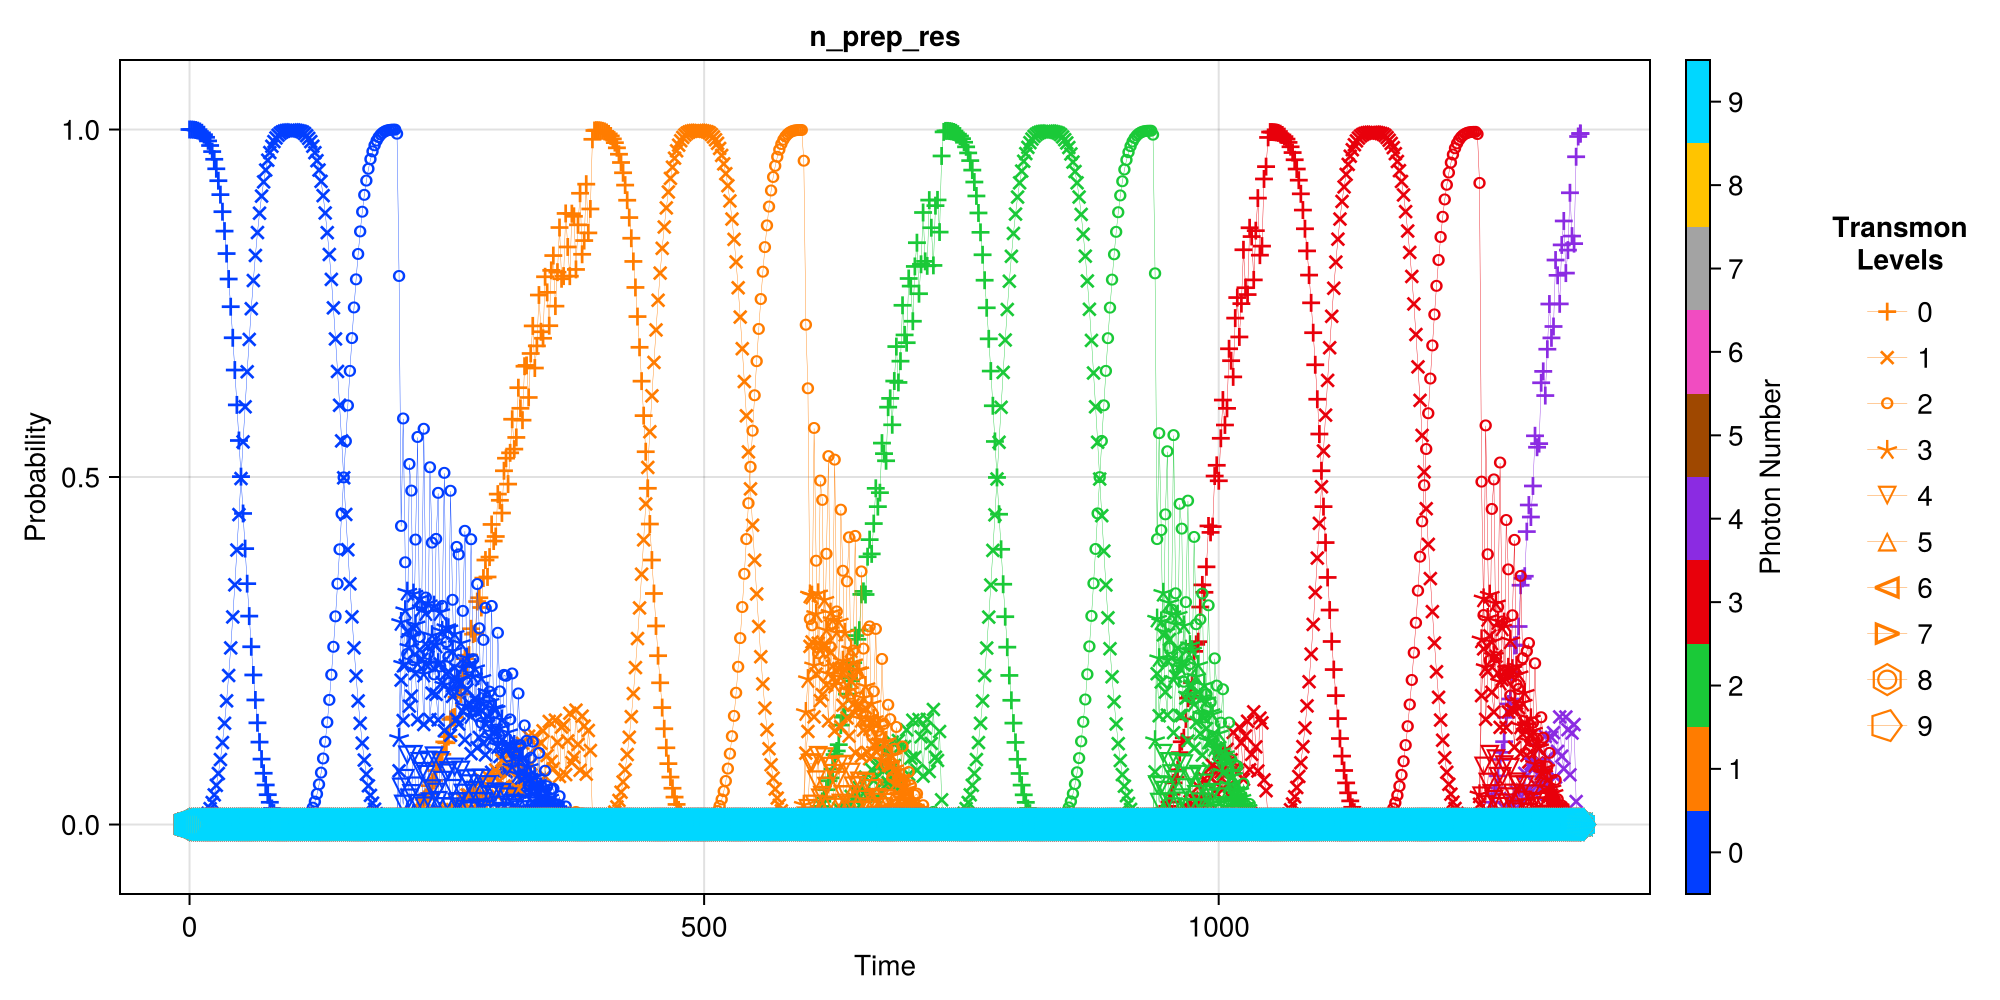

CairoMakie.Screen{IMAGE}


In [40]:
SC.Dynamics.PlotSingleModeEvolution(Mode3, n_prep_res["times"], EVs, axis_kwargs = Dict{Any, Any}("title" => "n_prep_res"), plot_every = 10)

##  Prepairing $|0\rangle+|n\rangle$

### $|0\rangle+|1\rangle$

In [44]:
Mode3.Stuff["op_drive_params"]["q_half_qe_0"]

KeyError: KeyError: key "q_half_qe_0" not found

In [ ]:
ops =  ["q_ge_0", "q_ef_0", "sb_f0g1", "q_ge_1", "q_ef_1", "sb_f1g2", "q_ge_2", "q_ef_2", "sb_f2g3", "q_ge_3", "q_ef_3", "sb_f3g4"]
ψ = Mode3.dressed_states[(0,0)]

n_prep_res = SC.Dynamics.RunPulseSequence(Mode3, ψ, ops)

The Name for this run is: Operator_Sequence_2024-10-23T17:24:10.055
It is being saved at: Data/
[2024-10-23 17:24:10] Info: Running operator q_ge_0
[2024-10-23 17:24:10] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-10-23 17:24:13] Info: Time Evolution Complete
[2024-10-23 17:24:13] Info: Saving Steps
[2024-10-23 17:24:14] Info: Done with Step_1
[2024-10-23 17:24:14] Info: Running operator q_ef_0
[2024-10-23 17:24:14] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-10-23 17:24:17] Info: Time Evolution Complete
[2024-10-23 17:24:17] Info: Saving Steps
[2024-10-23 17:24:18] Info: Done with Step_2
[2024-10-23 17:24:18] Info: Running operator sb_f0g1
[2024-10-23 17:24:18] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 06s (ETA: 0h 00m 00s)
[2024-10-23 17:24:25] Info:

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


Dict{Any, Any} with 2 entries:
  "times"  => Any[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8  …  1349.71,…
  "states" => Any[Quantum Object:   type=Ket   dims=[10, 10]   size=(100,)…

In [ ]:
EVs = SC.Utils.Get_EVs(n_prep_res["states"], SC.Utils.Get_Projection_Ops(Mode3.dressed_states));

[2024-10-23 17:29:12] Info: Making Plot


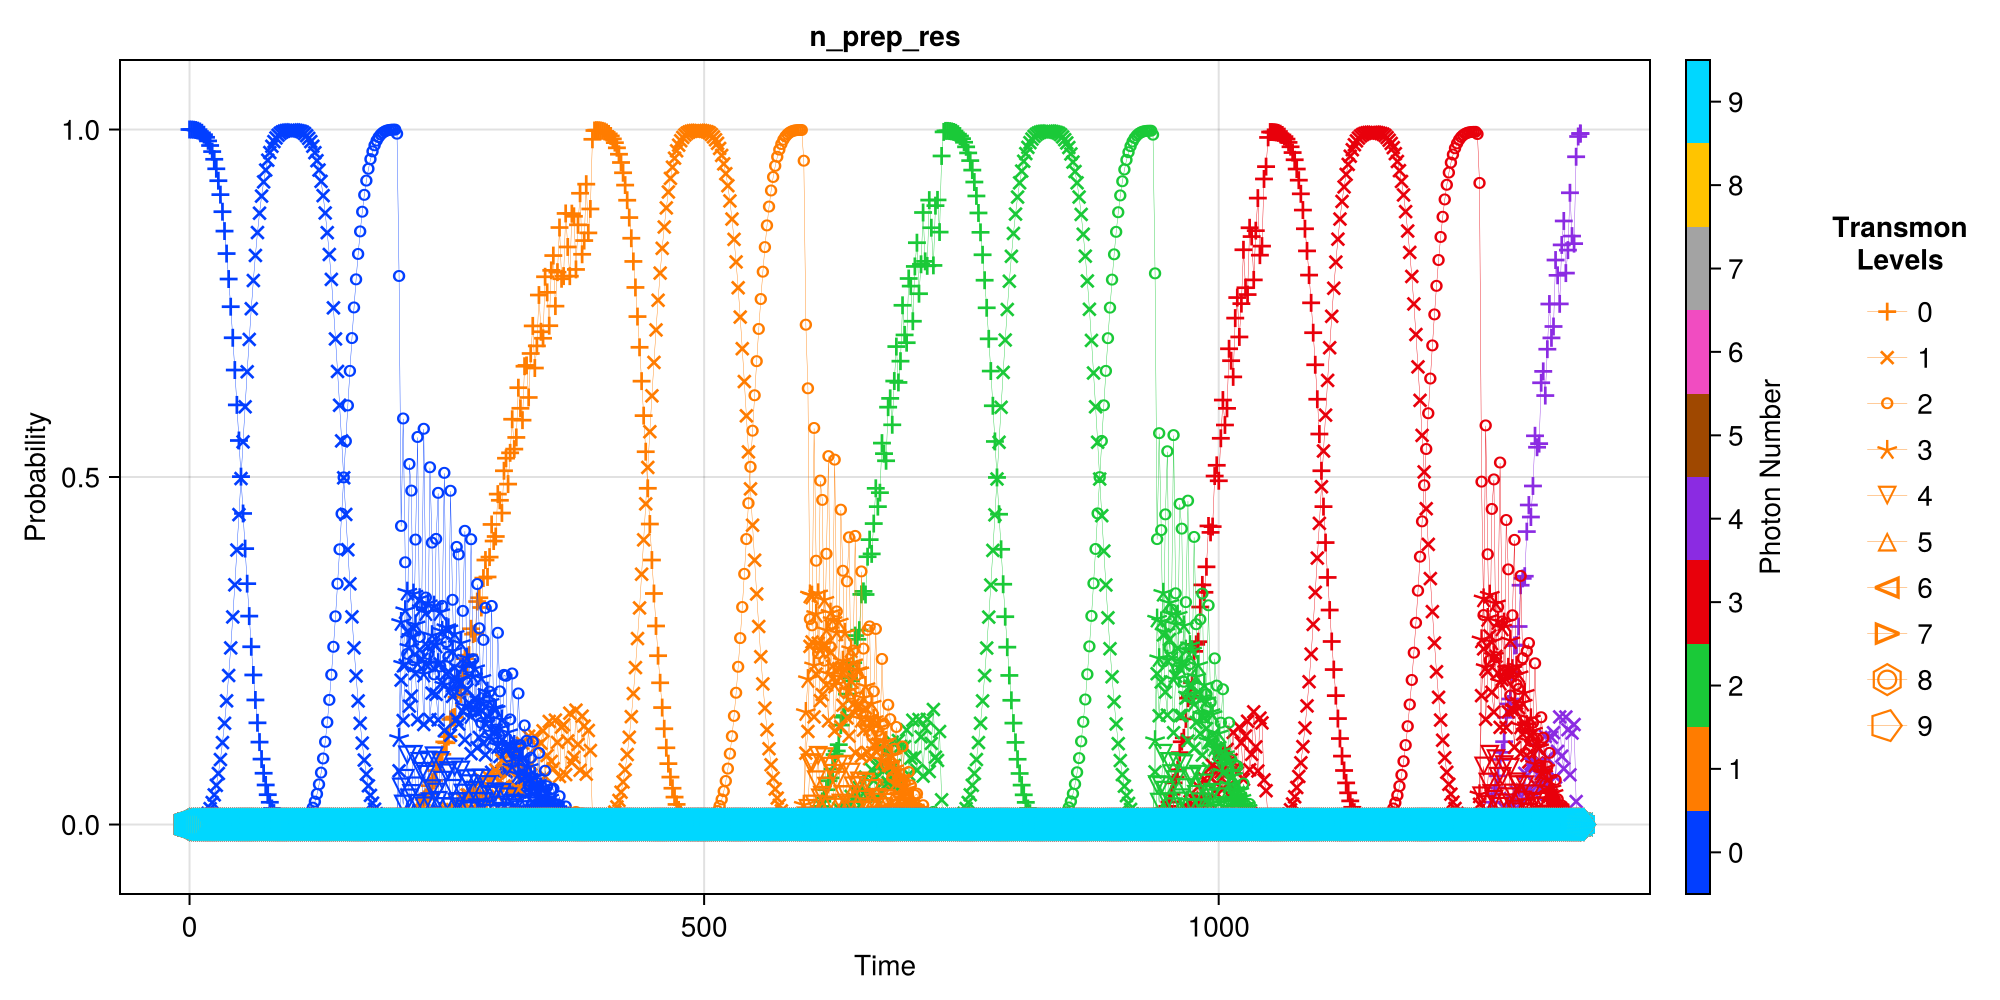

CairoMakie.Screen{IMAGE}


In [ ]:
SC.Dynamics.PlotSingleModeEvolution(Mode3, n_prep_res["times"], EVs, axis_kwargs = Dict{Any, Any}("title" => "n_prep_res"), plot_every = 10)

# Plots of Ramp times and shapes

In [21]:
Mode3.Stuff["op_drive_params"]#["f0g1_SS_10.0"]

Dict{String, Any} with 776 entries:
  "f0g1_G_81.77215189873418_chirped"   => Dict{String, Any}("pulse_time"=>343.5…
  "f0g1_G_2.0209999999999995_chirped"  => Dict{String, Any}("pulse_time"=>184.0…
  "f0g1_G_90.88607594936708_chirped"   => Dict{String, Any}("pulse_time"=>361.6…
  "f0g1_G_55.44303797468354"           => Dict{String, Any}("pulse_time"=>277.6…
  "f0g1_G_14.545_chirped"              => Dict{String, Any}("pulse_time"=>206.9…
  "f0g1_G_0.001"                       => Dict{String, Any}("pulse_time"=>180.0…
  "f0g1_G_92.9113924050633"            => Dict{String, Any}("pulse_time"=>344.5…
  "f0g1_SS_8.687"                      => Dict{String, Any}("pulse_time"=>196.0…
  "f0g1_G_86.83544303797468"           => Dict{String, Any}("pulse_time"=>333.6…
  "q_ge_0"                             => Dict{String, Any}("pulse_time"=>100, …
  "f0g1_G_5.253"                       => Dict{String, Any}("pulse_time"=>190.5…
  "f0g1_SS_6.061"                      => Dict{String, Any}("pulse_time"=

In [5]:
Ramp_Times = vcat(collect(LinRange(0.001, 20-0.001, 100)),collect(LinRange(20, 100, 80)))
envelopes = ["Sine_Squared_Ramp", "Gaussian_Ramp"]
chirped = [true, false]

res = Dict{Any, Any}()

for envelope in envelopes
    for rt in Ramp_Times
        for chirp in chirped
            drive_name = ""
            if envelope == "Sine_Squared_Ramp"
                drive_name = "f0g1_SS_"*string(rt)
            end
            if envelope == "Gaussian_Ramp"
                drive_name = "f0g1_G_"*string(rt)
            end

            if chirp
                drive_name = drive_name*"_chirped"
            end

            if drive_name in keys(Mode3.Stuff["op_drive_params"])
                res[drive_name] = Mode3.Stuff["op_drive_params"][drive_name]["accuracy"]
            end
        end
    end
end

In [6]:
SS = []
SS_x = []
SS_chirp = []
SS_chirp_x = []

G = []
G_x = []
G_chirp = []
G_chirp_x = []

for key in keys(res)
    key_split = split(key, "_")
    if length(key_split) == 4
        if key_split[2] == "SS"
            push!(SS_chirp, res[key])
            push!(SS_chirp_x, Meta.parse(key_split[3]))
        end
        if key_split[2] == "G"
            push!(G_chirp, res[key])
            push!(G_chirp_x, Meta.parse(key_split[3]))
        end
    else
        if key_split[2] == "SS"
            push!(SS, res[key])
            push!(SS_x, Meta.parse(key_split[3]))
        end
        if key_split[2] == "G"
            push!(G, res[key])
            push!(G_x, Meta.parse(key_split[3]))
        end
    end
end


In [7]:
permvec = sortperm(SS_x)
SS = SS[permvec]
SS_x = sort(SS_x)

permvec = sortperm(SS_chirp_x)
SS_chirp = SS_chirp[permvec]
SS_chirp_x = sort(SS_chirp_x)

permvec = sortperm(G_x)
G = G[permvec]
G_x = sort(G_x)

permvec = sortperm(G_chirp_x)
G_chirp = G_chirp[permvec]
G_chirp_x = sort(G_chirp_x);

In [8]:
SS_chirp_x[argmax(SS_chirp)]

100.0

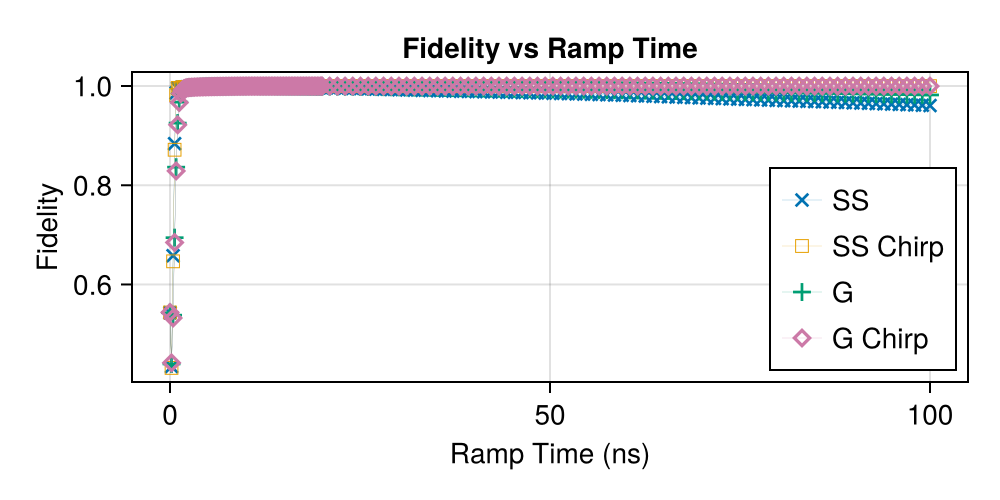

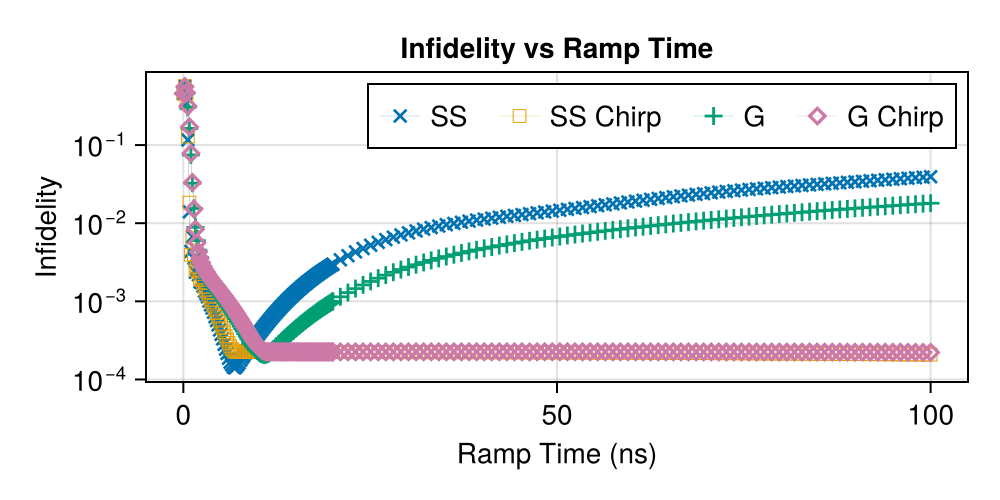

CairoMakie.Screen{IMAGE}


In [9]:
f = cm.Figure(size = (500, 250), px_per_unit = 8)
ax = cm.Axis(f[1,1], title = "Fidelity vs Ramp Time", xlabel = "Ramp Time (ns)", ylabel = "Fidelity")

cm.scatterlines!(ax, SS_x, SS, marker = '×', label = "SS", linewidth = 0.1, markersize = 20)
cm.scatterlines!(ax, SS_chirp_x, SS_chirp, marker = '□', label = "SS Chirp", linewidth = 0.1)
cm.scatterlines!(ax, G_x, G, marker = '+', label = "G", linewidth = 0.1, markersize = 20)
cm.scatterlines!(ax, G_chirp_x, G_chirp, marker = '⋄', markersize = 20, label = "G Chirp", linewidth = 0.1)
cm.axislegend(ax, position = :rb)

cm.display(f)


 
f = cm.Figure(size = (500, 250), px_per_unit = 8)
ax = cm.Axis(f[1,1], yscale = cm.log10, title = "Infidelity vs Ramp Time", xlabel = "Ramp Time (ns)", ylabel = "Infidelity")

cm.scatterlines!(ax, SS_x, -(SS.-1), marker = '×', label = "SS", linewidth = 0.1, markersize = 20)
cm.scatterlines!(ax, SS_chirp_x, -(SS_chirp.-1), marker = '□', label = "SS Chirp", linewidth = 0.1)
cm.scatterlines!(ax, G_x, -(G.-1), marker = '+', label = "G", linewidth = 0.1, markersize = 20)
cm.scatterlines!(ax, G_chirp_x, -(G_chirp.-1), marker = '⋄', markersize = 20, label = "G Chirp", linewidth = 0.1)
cm.axislegend(ax, position = :rt, orientation = :horizontal)

cm.display(f)




# Ramp Time Floquet

In [ ]:
m(ε) = sum(Mode3.Stuff["Chirp Params"]["fn_gn+1"][1]["param"][n]*ε^n for n in 1:length(Mode3.Stuff["Chirp Params"]["fn_gn+1"][1]["param"]))
f = cm.Figure(size = (500, 250))
ax = cm.Axis(f[1,1], title = "Stark Shift Fit", xlabel = "Drive Strength", ylabel = "Stark Shift")

x = collect(LinRange(0, 1, 51))
cm.plot!(ax, x, m.(x), label = "fit")
cm.plot!(ax, Mode3.Stuff["Chirp Params"]["fn_gn+1"][2], Mode3.Stuff["Chirp Params"]["fn_gn+1"][3], label = "data")
cm.axislegend(ax, position = :rb)

f

## Chirped

In [6]:
states_to_track = Dict{Any, Any}();
states_to_track[(0,0)] = Mode3.dressed_states[(0,0)];
states_to_track[(1,0)] = Mode3.dressed_states[(1,0)];
states_to_track[(2,0)] = Mode3.dressed_states[(2,0)];
states_to_track[(3,0)] = Mode3.dressed_states[(3,0)];
#states_to_track[(4,0)] = Mode3.dressed_states[(4,0)];
states_to_track[(0,1)] = Mode3.dressed_states[(0,1)];
states_to_track[(1,1)] = Mode3.dressed_states[(1,1)];
#states_to_track[(2,1)] = Mode3.dressed_states[(2,1)];
#states_to_track[(3,1)] = Mode3.dressed_states[(3,1)];
#states_to_track[(0,2)] = Mode3.dressed_states[(0,2)];
#states_to_track[(1,2)] = Mode3.dressed_states[(1,2)];
#states_to_track[(2,2)] = Mode3.dressed_states[(2,2)];
states_to_track = copy(Mode3.dressed_states);#Dict{Any, Any}();

UndefVarError: UndefVarError: `Mode3` not defined

In [62]:
for key in keys(Mode3.Stuff["op_drive_params"])
    println(key)
end 

f0g1_G_81.77215189873418_chirped
f0g1_G_2.0209999999999995_chirped
f0g1_G_90.88607594936708_chirped
f0g1_G_55.44303797468354
f0g1_G_14.545_chirped
f0g1_G_0.001
f0g1_G_92.9113924050633
f0g1_SS_8.687
f0g1_G_86.83544303797468
q_ge_0
f0g1_G_5.253
f0g1_SS_6.061
f0g1_G_32.151898734177216
f0g1_SS_43.291139240506325
f0g1_SS_7.5
f0g1_G_27.088607594936704_chirped
f0g1_G_75.69620253164558
f0g1_G_6.061_chirped
f0g1_SS_11.918999999999999_chirped
f0g1_G_24.050632911392405
f0g1_G_3.233_chirped
f0g1_SS_9.495_chirped
f0g1_SS_10.101_chirped
f0g1_G_85.82278481012659_chirped
f0g1_G_56.45569620253165
f0g1_G_0.405
f0g1_G_62.531645569620245_chirped
f0g1_SS_38.22784810126582_chirped
f0g1_G_78.73417721518987_chirped
f0g1_SS_12.121
f0g1_G_9.495
f0g1_G_73.67088607594937_chirped
f0g1_G_70.63291139240506
f0g1_SS_14.140999999999998
f0g1_SS_60.0_chirped
f0g1_G_16.767_chirped
f0g1_G_2.5
f0g1_SS_18.989_chirped
f0g1_SS_17.171
f0g1_SS_54.43037974683544
f0g1_G_8.283_chirped
f0g1_G_60.50632911392405
f0g1_G_15.0
f0g1_G_13.

In [20]:
op_name = "f0g1_SS_16.767_chirped" #"f0g1_SS_70.63291139240506_chirped"
pulse = copy(Mode3.Stuff["op_drive_params"][op_name])

#pulse["pulse_time"] = 10
envelope_args = Dict{Symbol, Any}()
for key in keys(Mode3.Stuff["op_drive_params"][op_name]["Envelope Args"])
    envelope_args[Symbol(key)] = Mode3.Stuff["op_drive_params"][op_name]["Envelope Args"][key]
end

pt = pulse["pulse_time"]
rt = pulse["Envelope Args"]["ramp_time"]
ft = pt-2*rt 


ε0 = pulse["epsilon"]
ν0 = pulse["freq_d"]


εt(t) = ε0*SC.Dynamics.Envelopes.Envelope_Dict[pulse["Envelope"]](t; envelope_args...)



νε(ε) = ν0+pulse["shift"]
if "chirp_params" in keys(pulse)
    νε(ε) = SC.Dynamics.chirper(ν0, pulse["chirp_params"])(ε)
end

νft = νε(ε0) 
Tft = abs(1/νft)
T0 = abs(1/ν0)

Tr =1*Tft


times_to_sample = collect(LinRange(0.0, pt, 500000))

ev = SC.Dynamics.Envelopes.Get_Envelope(pulse["Envelope"], pulse["Envelope Args"])
ϕ = SC.Dynamics.Get_Drive_Coef(νε, ε0, envelope = ev, return_ϕ = true, drive_time = pt)#pulse["pulse_time"]);
f_for_peak(t) = -abs.(sin.(ϕ.(t)))
for_peaks = f_for_peak.(times_to_sample)
indices, heights = Peaks.findmaxima(for_peaks)

times = vcat([0], times_to_sample[indices][2:2*5:end], [pt])



ψ = Mode3.dressed_states[(2,0)]



solver_kwargs = Dict{Any, Any}("abstol" => 1e-8, "reltol" => 1e-8)
pulse_res = SC.Dynamics.RunSingleOperator(Mode3, ψ, pulse, spns = 10, solver_kwargs = solver_kwargs, tspan = times)



[2024-10-24 10:41:13] Info: Using Chirp
[2024-10-24 10:41:16] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-10-24 10:41:19] Info: Time Evolution Complete
[2024-10-24 10:41:19] Info: Done with DEFAULT


Solution of time evolution
(return code: Success)
--------------------------
num_states = 118
num_expect = 0
ODE alg.: Vern9{typeof(OrdinaryDiffEqCore.trivial_limiter!), typeof(OrdinaryDiffEqCore.trivial_limiter!), Static.False}(OrdinaryDiffEqCore.trivial_limiter!, OrdinaryDiffEqCore.trivial_limiter!, static(false), true)
abstol = 1.0e-8
reltol = 1.0e-8


In [21]:
list_of_params = []

for t in pulse_res.times
    ε = εt(t)
    ν = νε(ε)
    dict_to_append = Dict{Any, Any}("ε" => ε, "ν" => ν)#, "t0" => t)
    push!(list_of_params, dict_to_append)
end

floq_sweep_res = SC.Dynamics.Floquet_t0_Sweep(Mode3, list_of_params, states_to_track = states_to_track);

println("hi") 



[2024-10-24 10:41:19] Info: Beginning Floquet Sweep


Progress: 100%|█████████████████████████████████████████| Time: 0:00:12


[2024-10-24 10:41:31] Info: Done With Floquet Sweep
[2024-10-24 10:41:31] Info: Tracking State


Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:00

[2024-10-24 10:41:32] Info: Running the necessary time evolutions
hi


In [22]:
projections = Dict{Any, Any}()


for state in keys(states_to_track)
    projections[state] = []
    for i in 1:length(pulse_res.times)
        t = pulse_res.times[i]
        ε = εt(t)
        #idx = findall(x -> x == ε, epsilons_to_sample)
        Φ = floq_sweep_res[State = At(string(state)), Step = At(i)]["ψ"]
        push!(projections[state], abs(pulse_res.states[i]'*Φ)^2)
    end
end

[2024-10-24 10:41:32] Info: Making Plot


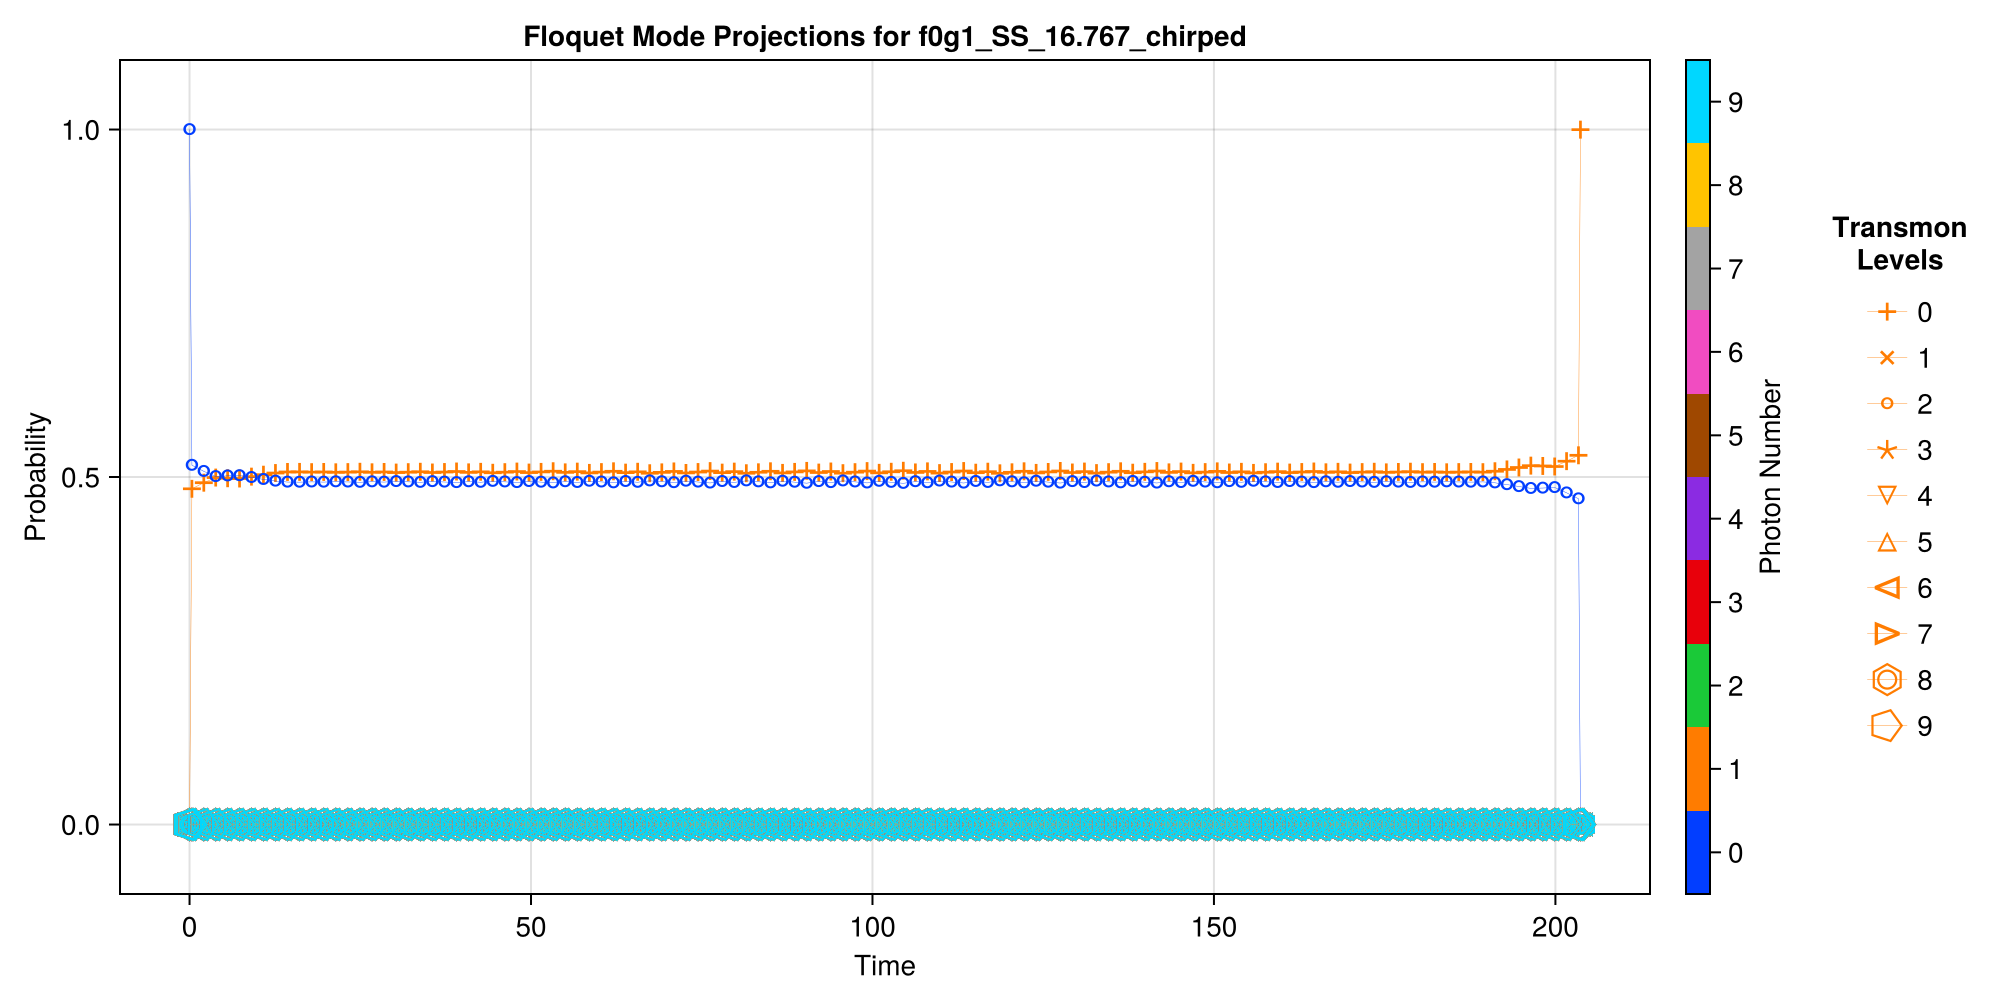

CairoMakie.Screen{IMAGE}


In [23]:
axis_kwargs = Dict{Any, Any}("title" => "Floquet Mode Projections for "*op_name)
SC.Dynamics.PlotSingleModeEvolution(Mode3, pulse_res.times, projections, axis_kwargs = axis_kwargs)

[2024-10-24 10:41:32] Info: Making Plot


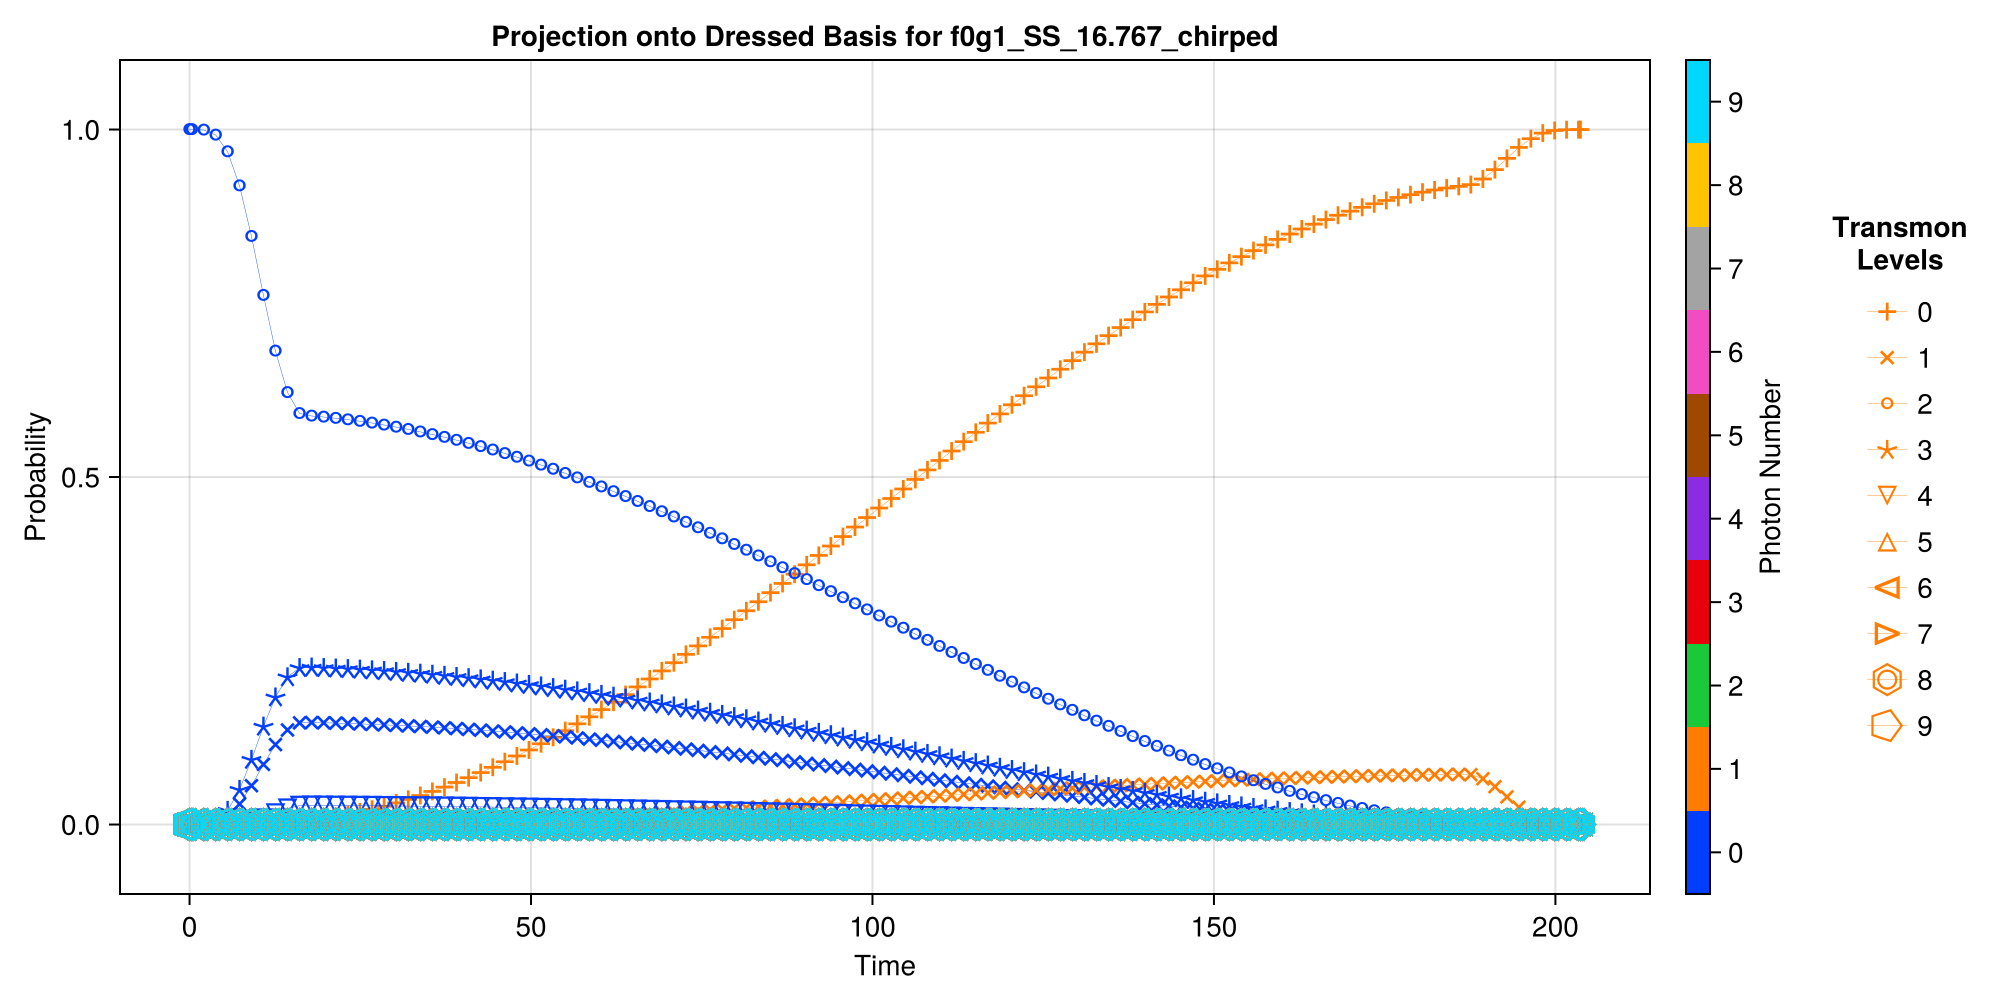

CairoMakie.Screen{IMAGE}


In [24]:
axis_kwargs = Dict{Any, Any}("title" => "Projection onto Dressed Basis for "*op_name)
SC.Dynamics.PlotSingleModeEvolution(Mode3, pulse_res.times, pulse_res.states, axis_kwargs = axis_kwargs)

# Playing with propagtors

In [ ]:
H = Mode3.Ĥ
T = abs(1/νft)
drive_coef = SC.Dynamics.Get_Drive_Coef(νft, ε0)
Ĥ_D = SC.Dynamics.Get_Ĥ_D(Mode3.n̂ₜ, drive_coef, TDOS = false)

function func(u, p, t)
    return -1im*(2*π*H.data-Ĥ_D(t).data)*u
end

u0 = Matrix(qt.qeye(prod(H.dims), dims = H.dims).data)

tspan = [0.0, T]

prob = ODEProblem(func, u0, tspan)

U = solve(prob, Vern9())#, reltol = 1e-9, abstol= 1e-9)

In [ ]:
H = Mode3.Ĥ
drive_coef = SC.Dynamics.Get_Drive_Coef(νft, ε0)
Ĥ_D_TDOS = SC.Dynamics.Get_Ĥ_D(Mode3.n̂ₜ, drive_coef)
U2 = SC.Dynamics.Propagator(Mode3, Ĥ_D_TDOS, T)

In [8]:
floq_SC = SC.Dynamics.Get_Floquet_t0_Eigsys(Mode3, Ĥ_D_TDOS, T);

In [ ]:
sort(floq_SC[1])

In [ ]:
U_eigs = eigen(U(T))

sort(-angle.(U_eigs.values)/T)

In [ ]:
function lorenz!(du,u,p,t)
    du[1] = 10.0(u[2]-u[1])
    du[2] = u[1]*(28.0-u[3]) - u[2]
    du[3] = u[1]*u[2] - (8/3)*u[3]
   end
   u0 = [1.0;0.0;0.0]
   tspan = (0.0,100.0)
   prob = ODEProblem(lorenz!,u0,tspan)
   
   
   sol = solve(prob,Tsit5())
   using Plots; plot(sol,vars=(1,2,3))